Valores de Shaply


In [2]:
#!pip install shap patsy yellowbrick xgboost

# Intuición

In [3]:
revenues = {
    "no_ad": 150,
    "social_media": 300,
    "google_advertising": 200,
    "email_marketing": 350,
    "social_media + google_advertising": 320,
    "social_media + email_marketing": 400,
    "google_advertising + email_marketing": 350,
    "social_media + google_advertising + email_marketing": 450,
}

In [4]:
weights = [1 / 3, 1 / 6, 1 / 6, 1 / 3]

## Google Advertising Marginal Contribution

$MC_1$ = Ingresos(Google advertisement) - Ingresos(no ad)
= 200 - 150 = 50


$MC_2$ = Ingresos(Google advertisement + social media) - Ingresos(social media)

= 320 - 300 = 20


$MC_3$ = Ingresos(Google advertisement + email marketing) - Ingresos(email marketing)
= 350 - 350 = 0


$MC_4$ = Ingresos(Google advertisement + email marketing + social media) - 

Ingresos(email marketing + social media) 

= 450 - 400 = 50


$$w_1 \times MC_1 + w_2 \times MC_2 + w_3 \times MC_2 + w_4 \times MC_4$$

Donde
- $MC_i$ es la contribucion marginal de Google advertisement para el grupo $i$ de $i=1, 2, 3, 4$
- $w_i$ denota el peso de la contribución marginal $MC_i$ para  $i=1, 2, 3, 4$.

\begin{align*}
&w_1 \times MC_1 + w_2 \times MC_2 + w_3 \times MC_2 + w_4 \times MC_4\\
&=\frac{1}{3}\times 50 + \frac{1}{6}\times 20 + \frac{1}{6}\times 0 + \frac{1}{3}\times50\\
&=36.67
\end{align*}

In [5]:
google_advertising_contribution = [
    revenues["google_advertising"] - revenues["no_ad"],
    revenues["social_media + google_advertising"] - revenues["social_media"],
    revenues["google_advertising + email_marketing"] - revenues["email_marketing"],
    revenues["social_media + google_advertising + email_marketing"]
    - revenues["social_media + email_marketing"],
]
google_advertising_contribution

[50, 20, 0, 50]

In [6]:
google_advertising_total_contribution = sum(
    [
        weight * contribution
        for weight, contribution in zip(weights, google_advertising_contribution)
    ]
)
google_advertising_total_contribution

36.66666666666666

## Contribución Marginal de Social Media 

In [7]:
social_media_contribution = [
    revenues["social_media"] - revenues["no_ad"],
    revenues["social_media + google_advertising"] - revenues["google_advertising"],
    revenues["social_media + email_marketing"] - revenues["email_marketing"],
    revenues["social_media + google_advertising + email_marketing"]
    - revenues["google_advertising + email_marketing"],
]
social_media_contribution

[150, 120, 50, 100]

In [8]:
social_media_total_contribution = sum(
    [
        weight * contribution
        for weight, contribution in zip(weights, social_media_contribution)
    ]
)
social_media_total_contribution

111.66666666666666

## Contribución Marginal de Email Marketing 

In [9]:
email_marketing_contribution = [
    revenues["email_marketing"] - revenues["no_ad"],
    revenues["google_advertising + email_marketing"] - revenues["google_advertising"],
    revenues["social_media + email_marketing"] - revenues["social_media"],
    revenues["social_media + google_advertising + email_marketing"]
    - revenues["social_media + google_advertising"],
]
email_marketing_contribution

[200, 150, 100, 130]

In [10]:
email_marketing_contribution = sum(
    [
        weight * contribution
        for weight, contribution in zip(weights, email_marketing_contribution)
    ]
)
email_marketing_contribution

151.66666666666663

## Contribución Total

In [11]:
(
    google_advertising_total_contribution
    + social_media_total_contribution
    + email_marketing_contribution
)

299.99999999999994

# INterpretación con Valores de Shap

In [36]:
import numpy as np

In [12]:
import pandas as pd

data = pd.read_csv("data/advertising.csv")
data.columns = data.columns.map(lambda row: "_".join(row.lower().split(" ")))
data.head(10)

,daily_time_spent_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,male,country,timestamp,clicked_on_ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [13]:
data.groupby('clicked_on_ad').count()

,daily_time_spent_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,male,country,timestamp
clicked_on_ad,,,,,,,,,
0,500,500,500,500,500,500,500,500,500
1,500,500,500,500,500,500,500,500,500


In [14]:

from patsy import dmatrices

y, X = dmatrices(
    "clicked_on_ad ~ daily_time_spent_on_site + age + area_income + daily_internet_usage  + male -1",
    data=data,
)

In [15]:
X_frame = pd.DataFrame(data=X, columns=X.design_info.column_names)
X_frame

,daily_time_spent_on_site,age,area_income,daily_internet_usage,male
0,68.95,35.0,61833.90,256.09,0.0
1,80.23,31.0,68441.85,193.77,1.0
2,69.47,26.0,59785.94,236.50,0.0
3,74.15,29.0,54806.18,245.89,1.0
4,68.37,35.0,73889.99,225.58,0.0
...,...,...,...,...,...
995,72.97,30.0,71384.57,208.58,1.0
996,51.30,45.0,67782.17,134.42,1.0
997,51.63,51.0,42415.72,120.37,1.0
998,55.55,19.0,41920.79,187.95,0.0


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [17]:
import xgboost
import shap
from sklearn.metrics import f1_score

model = xgboost.XGBClassifier().fit(X_train, y_train)

prediction = model.predict(X_test)
f1 = f1_score(y_test, prediction)
f1

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[00:55:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9619047619047619

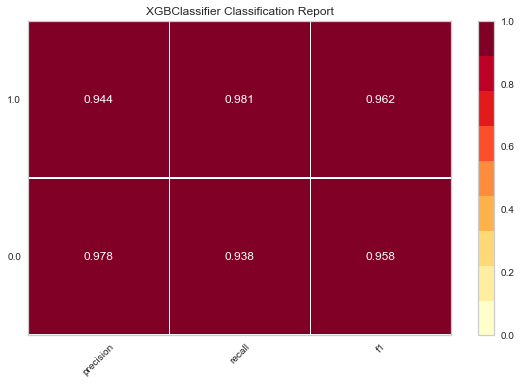

In [18]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## SHAP Summary Plot

In [19]:
explainer = shap.Explainer(model)
shap_values = explainer(X_frame)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


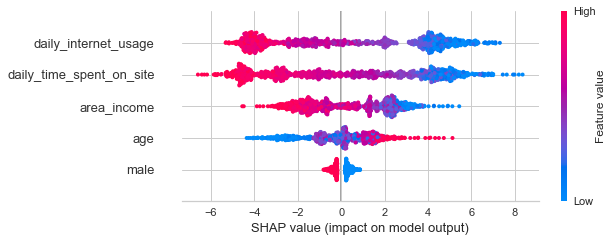

In [20]:
shap.summary_plot(shap_values, X)

## SHAP Waterfall Plot

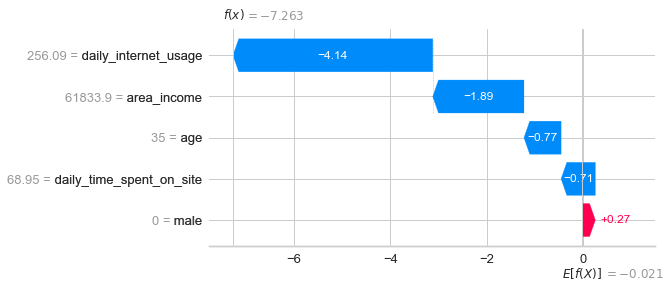

In [21]:
shap.plots.waterfall(shap_values[0])

$f(x)$ es la predicción despues de considerar todas las caracteristicas

$E[f(x)]$ es la media aritmetica de la predicción

$$f(x) - E[f(x)] = -7.263 - (-0.021) = -7.24$$
$$\text{Contribución total} = -4.14 - 1.89 - 0.77 - 0.71 + 0.27=-7.24$$

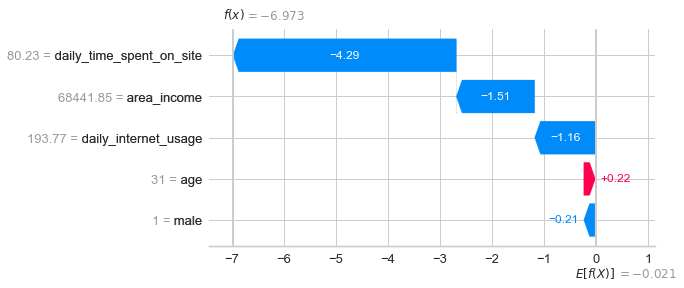

In [22]:
shap.plots.waterfall(shap_values[1])

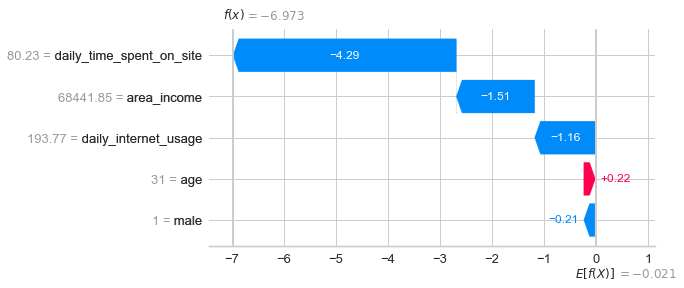

In [23]:
shap.plots.waterfall(shap_values[1])

### SHAP Scatter Plot

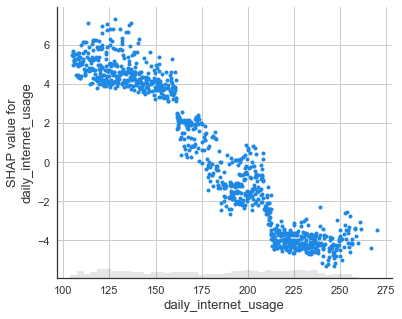

In [24]:
shap.plots.scatter(shap_values[:, "daily_internet_usage"])

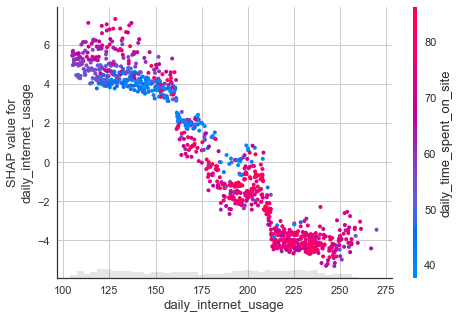

In [25]:
shap.plots.scatter(shap_values[:, "daily_internet_usage"], color=shap_values)

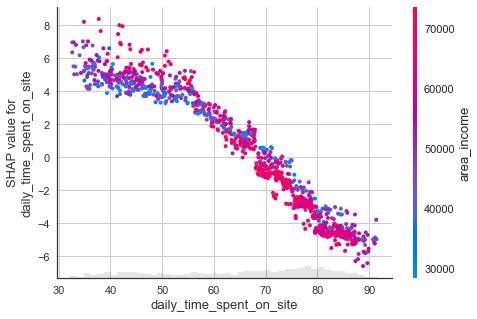

In [26]:
shap.plots.scatter(shap_values[:, "daily_time_spent_on_site"], color=shap_values)

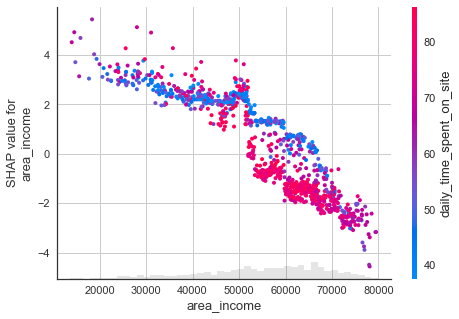

In [27]:
shap.plots.scatter(shap_values[:, "area_income"], color=shap_values)

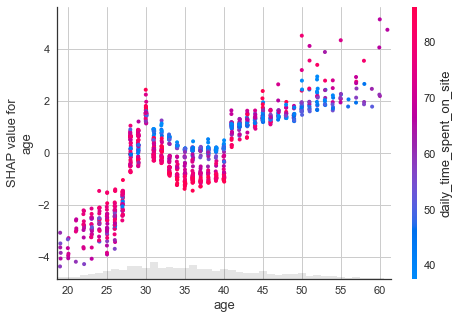

In [28]:
shap.plots.scatter(shap_values[:, "age"], color=shap_values)

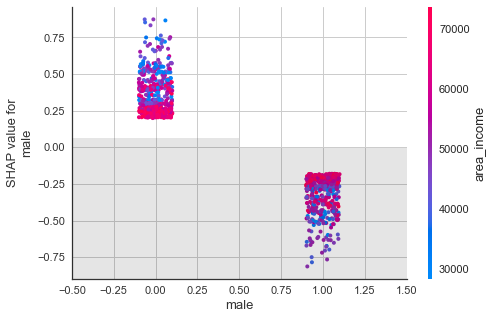

In [29]:
shap.plots.scatter(shap_values[:, "male"], color=shap_values)

## SHAP Bar Plot

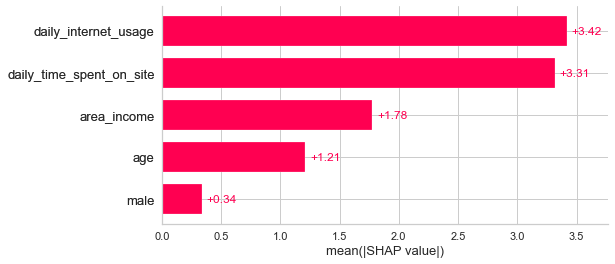

In [30]:
shap.plots.bar(shap_values)

## SHAP Interaction Value Summary Plot

In [31]:
shap_interaction_values = explainer.shap_interaction_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


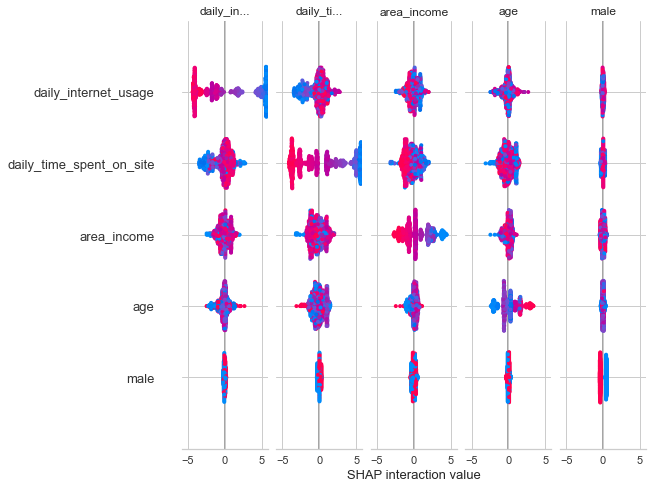

In [32]:
shap.summary_plot(shap_interaction_values, X_frame)

In [33]:
def xgb_shap_transform_scale(original_shap_values, Y_pred, which):
    from scipy.special import expit
    
    from scipy.special import expit 
    untransformed_base_value = original_shap_values.base_values[-1]
   
    original_explanation_distance = np.sum(original_shap_values.values, axis=1)[which]
    
    base_value = expit(untransformed_base_value ) # = 1 / (1+ np.exp(-untransformed_base_value))
    distance_to_explain = Y_pred[which] - base_value
    distance_coefficient = original_explanation_distance / distance_to_explain
    shap_values_transformed = original_shap_values / distance_coefficient
    shap_values_transformed.base_values = base_value
    shap_values_transformed.data = original_shap_values.data
    
    return shap_values_transformed    

In [43]:
shap_values

.values =
array([[-0.70967835, -0.76920646, -1.8906426 , -4.1404977 ,  0.26779345],
       [-4.2897687 ,  0.22077265, -1.5057304 , -1.1645775 , -0.21236618],
       [-1.0056995 , -2.4400592 , -1.8937256 , -4.5961084 ,  0.2745252 ],
       ...,
       [ 3.7881444 ,  1.6945415 ,  2.0751946 ,  4.206768  , -0.263991  ],
       [ 5.204006  , -3.469701  ,  1.9007264 , -1.2682177 ,  0.6547506 ],
       [ 4.647792  , -2.8822534 ,  3.050469  ,  0.7126198 ,  0.52085644]],
      dtype=float32)

.base_values =
array([-0.02096456, -0.02096456, -0.02096456, -0.02096456, -0.02096456,
       -0.02096456, -0.02096456, -0.02096456, -0.02096456, -0.02096456,
       -0.02096456, -0.02096456, -0.02096456, -0.02096456, -0.02096456,
       -0.02096456, -0.02096456, -0.02096456, -0.02096456, -0.02096456,
       -0.02096456, -0.02096456, -0.02096456, -0.02096456, -0.02096456,
       -0.02096456, -0.02096456, -0.02096456, -0.02096456, -0.02096456,
       -0.02096456, -0.02096456, -0.02096456, -0.02096456, -0.02

In [44]:
obs = 10
Y_pred = model.predict(X_train)
print("La prediccion es ", Y_pred[obs])
shap_values_transformed = xgb_shap_transform_scale(shap_values, Y_pred, obs)
shap.plots.waterfall(shap_values_transformed[obs])

La prediccion es  0.0


IndexError: too many indices for array